# Машинное обучение моделей  по прогнозированию оттока клиентов сети фитнес-центров


**Цели и задачи проекта:** провести анализ данных фитнес-центра с целью разработки прогноза вероятности оттока клиентов и последующей подготовки стратегии по их удержанию.

**Входные данные:** анкеты клиентов фитнес-центра, объединённые в датасет по ряду признаков, включающих пол и возраст клиента, район проживания/работы относительно фитнес-центра, участие клиента в партнёрской программе, использование промо-кода, наличие контактного телефона и время с момента первого обращения. Во входных данных также содержится информация на основе журнала посещений, где указана длительность абонемента и срок его истечения, факт посещения групповых занятий, средняя частота посещений фитнес-центра, суммарная выручка от использования других услуг центра. В данных также отражен факт оттока в текущем месяце. 

**Обозначения категорий исходных данных:** Исходные данные для проекта содержатся в файле формата csv. Обозначения переменных для исходного датасета rest_data.csv приведены ниже:

Данные клиента за предыдущий до проверки факта оттока месяц:
* *gender* — пол,
* *Near_Location* — проживание или работа в районе, где находится фитнес-центр,
* *Partner* — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента),
* *Promo_friends* — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента),
* *Phone* — наличие контактного телефона,
* *Age* — возраст,
* *Lifetime* — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* *Contract_period* — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год),
* *Month_to_end_contract* — срок до окончания текущего действующего абонемента (в месяцах),
* *Group_visits* — факт посещения групповых занятий,
* *Avg_class_frequency_total* — средняя частота посещений в неделю за все время с начала действия абонемента,
* *Avg_class_frequency_current_month* — средняя частота посещений в неделю за предыдущий месяц,
* *Avg_additional_charges_total* — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


* *Churn* — факт оттока в текущем месяце.

**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт и предобработка данных.* На этом этапе получаем общую информацию об имеющихся у нас в распоряжении данных, их типах, полноте и правильности представления. Предварительно оцениваем объем данных в исходном датасете, а также присутствие пропусков и дубликатов. Обращаем пристальное внимание на недостатки исходных данных и их релевантность: анализируем пропуски (если есть), приводим названия колонок-признаков к нижнему регистру, преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты с целью исключения искажений в результатах. 


* *Исследовательский анализ данных.* Изучим средние значения и стандартные отклонения, характерные для каждого признака в датасете. Рассмотрим средние значения признаков применительно к двум группам — тех, кто ушел в отток и тех, кто остался. Построим гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Сформируем матрицу корреляций признаков с целью проверки на наличие сильной линейной корреляции между парами признаков.


* *Построение модели прогнозирования оттока клиентов.* В данной части работы, построим модели бинарной классификации клиентов, с использованием обучающих алгоритмов на основе логистической регрессии и "случайного леса". Оценим качество предсказаний моделей на валидационной выборке с использованием  метрик. Выделим модель, которая показала себя лучше на основании метрик. 


* *Кластеризация клиентов.* Эта часть проекта будет направлена на построение матрицы расстояний между признаками, с последующим получением дендрограммы связей. В результате будет выделено число кластеров, по которым модель может разделить клиентов. Следующим шагом будет разработка связанной модели кластеризации с использованием алгоритма K-Means. В заключение, построим распределения признаков для кластеров и для каждого полученного кластера посчитаем долю оттока клиентов. Проанализируем полученные результаты.


* *Общие выводы и рекомендации*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе, на основе имеющихся данных и анализа, мы отразим ключевые рекомендации для владельцев фитнес-клуба по стратегии взаимодействия с клиентами и их удержания.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-и-предобработка-данных." data-toc-modified-id="Импорт-и-предобработка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт и предобработка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Алгоритм-логистической-регрессии" data-toc-modified-id="Алгоритм-логистической-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм логистической регрессии</a></span><ul class="toc-item"><li><span><a href="#Целевая-переменная" data-toc-modified-id="Целевая-переменная-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Целевая переменная</a></span></li><li><span><a href="#Формирование-обучающей-и-валидационной-выборки.-Обучение-моделей-и-их-сравнение." data-toc-modified-id="Формирование-обучающей-и-валидационной-выборки.-Обучение-моделей-и-их-сравнение.-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Формирование обучающей и валидационной выборки. Обучение моделей и их сравнение.</a></span></li><li><span><a href="#Определение-оптимального-значения-параметра-регуляризации-С-и-оценка-модели" data-toc-modified-id="Определение-оптимального-значения-параметра-регуляризации-С-и-оценка-модели-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Определение оптимального значения параметра регуляризации С и оценка модели</a></span></li></ul></li><li><span><a href="#Алгоритм-&quot;случайный-лес&quot;" data-toc-modified-id="Алгоритм-&quot;случайный-лес&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Алгоритм "случайный лес"</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-и-использование-метрик" data-toc-modified-id="Обучение-модели-и-использование-метрик-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Обучение модели и использование метрик</a></span></li><li><span><a href="#Автоматический-подбор-параметров-для-модели-и-её-оценка" data-toc-modified-id="Автоматический-подбор-параметров-для-модели-и-её-оценка-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Автоматический подбор параметров для модели и её оценка</a></span></li></ul></li><li><span><a href="#Оценка-важности-признаков-для-моделей" data-toc-modified-id="Оценка-важности-признаков-для-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценка важности признаков для моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#&quot;Случайный-лес&quot;" data-toc-modified-id="&quot;Случайный-лес&quot;-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>"Случайный лес"</a></span></li></ul></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Матрица-расстояний-признаков-и-дендрограмма" data-toc-modified-id="Матрица-расстояний-признаков-и-дендрограмма-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Матрица расстояний признаков и дендрограмма</a></span></li><li><span><a href="#Модель-кластеризации-K-Means" data-toc-modified-id="Модель-кластеризации-K-Means-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель кластеризации K-Means</a></span></li><li><span><a href="#Определение-доли-оттока" data-toc-modified-id="Определение-доли-оттока-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение доли оттока</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

## Импорт и предобработка данных.

In [1]:
# установка обновлений пакетов Seaborn и Plotly для визуализации данных
!pip install seaborn --upgrade -q
!pip install plotly==5.1.0 -q
!pip install scikit_learn==0.24.2 -q

In [2]:
import pandas as pd
import numpy as np

# графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot

# библиотеки машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# алгоритмы машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# метрики машинного обучения
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

# настройка параметров регуляризации
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# классы модели кластеризации
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# получение статичных изображений графиков plotly для отображения на GitHub
import plotly.io as pio
pio.renderers.default = "svg"

In [3]:
df=pd.read_csv('gym_churn.csv')

Ознакомимся с имеющимся исходным датасетом *gym_churn.csv*, используя следующую функцию-шаблон:

In [4]:
def general_info(dataset):
    """
    Функция дает краткую информацию о размере датасета и типах данных, а также проверяет на присутствие полных дубликатов
    """
    # оформление комментариев при выводе данных
    class color:
       RED = '\033[91m'
       BOLD = '\033[1m'
       END = '\033[0m'
    
    # Вывод всех колонок датасета из запроса
    print('')
    print(color.RED + color.BOLD + 'Информация, включающая записи датасета:' + color.END)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', 130)
    display(dataset.head())
    
    # Вывод информации о размере датасета, типе данных и пропущенных/минимальных/максимальных значениях 
      
    print(color.RED + color.BOLD + 'Информация о размере датасета, типе данных и пропущенных значениях:' + color.END)
    print('')
    dataset.info()
          
    # Вывод информации о количестве дубликатов
    print('')
    duplicates_amount = dataset.duplicated().sum()
    print(color.RED + color.BOLD + 'Количество полных дубликатов в данных:'+ color.END, duplicates_amount)

In [5]:
general_info(df)


Информация, включающая записи датасета:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Информация о размере датасета, типе данных и пропущенных значениях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   

Приведём названия колонок датасета к нижнему регистру: 

In [6]:
df.columns = df.columns.str.lower()

Приобразуем тип данных столбца *month_to_end_contract* к целочисленному:

In [7]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [8]:
df.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0


Сформируем список колонок и проверим их соответствие бинарным значениям: 

In [9]:
binary_column_list = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

In [10]:
print([df[x].unique() for x in binary_column_list])

[array([1, 0], dtype=int64), array([1, 0], dtype=int64), array([1, 0], dtype=int64), array([1, 0], dtype=int64), array([0, 1], dtype=int64), array([1, 0], dtype=int64), array([0, 1], dtype=int64)]


Отметим, что среди уникальных значений длительности текущего действующего абонемента отсутствует период в 3 месяца, указанный в описании проекта. 

In [11]:
df['contract_period'].unique()

array([ 6, 12,  1], dtype=int64)

**Промежуточные выводы:**
* данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* исходный датасет содержит 4000 записей,  разделенных по 14-ти параметрам-характеристикам о данных клиентов за предыдущий до проверки факта оттока месяц, информацией журнала посещений, покупок и текущий статус абонемента клиента;
* названия колонок приведены к нижнему регистру;
* тип данных колонки *month_to_end_contract* преобразован в целочисленный (int);
* датасет не содержит пропусков и полных дубликатов, но не включает данные о длительности абонемента в 3 месяца.

## Исследовательский анализ данных

Изучим средние значения и стандартные отклонения, характерные для каждого признака в датасете:

In [12]:
df.describe().loc[['mean', 'std', 'min', 'max', '50%']]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000


Из таблицы видно, что, например, пол клиентов представлен в равных пропорциях, а посетители предпочитают выбирать фитнес-центр недалеко от работы или дома. Около половины посетителей из организаций-партнеров фитнес-центра, а по промо-акции "приведи друга" пришли менее трети от всего количества клиентов. Средняя длительность текущего действующего абонемента составляет 4.7 месяца, а возраст - 29 лет. Отток клиентов в текущем месяце примерно 26%.

Дополнительно определим средние значения признаков в двух группах (оставшихся клиентов и попавших в отток):

In [13]:
display(df.groupby('churn').mean().reset_index())

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Сформируем два списка признаков датасета, для удобства вывода гистограмм их распределения:

In [14]:
column_binary_list_plot = (['gender',
                            'near_location',
                            'partner',
                            'promo_friends',
                            'phone',
                            'group_visits']
                           )

In [15]:
column_values_list_plot = (['contract_period',
                            'age',
                            'avg_additional_charges_total',
                            'month_to_end_contract',
                            'lifetime',
                            'avg_class_frequency_total',
                            'avg_class_frequency_current_month']
                           )

Подготовим функцию, выводящую гистограммы распределения для каждого признака в абсолютных значениях, в процентных значениях каждого признака и в долях для двух групп (тех, кто попал в отток и тех, кто остался):

In [16]:
def attribute_plots(column, kde_option, legend_position, mult_1, mult_2, mult_3, alpha_value):
    '''
    Функция, строящая гистограммы распределения значений для каждого признака датасета и
    учитывающая показатели оттока клиентов.
    '''
     
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))   
    
    fig.suptitle('Распределение признаков для клиентов, попавших и не попавших в отток')
           
    # абсолютные значения
    g = (sns.histplot(ax=axes[0],
                      x=column,
                      data=df,
                      multiple=mult_1,
                      hue='churn',
                      stat='count',
                      kde = kde_option,
                      bins=12,
                      palette='Set2',
                      alpha=alpha_value)
        )
    
    g.set_title('Абсолютные значения')
    g.set_ylabel('Количество клиентов (чел.)')
    g.legend(title='Клиенты', loc=legend_position, labels=['ушедшие', 'оставшиеся'])
    
    # процентные значения
    g = (sns.histplot(ax=axes[1],
                      x=column,
                      data=df,
                      multiple=mult_2,
                      hue='churn',
                      stat='percent',
                      common_norm = False,
                      kde = kde_option,
                      bins=12,
                      palette='Set2',
                      alpha=alpha_value)
        )
       
    g.set_title('Процентные значения')
    g.set_ylabel('% от общего числа клиентов в категории')
    g.legend(title='Клиенты', loc=legend_position, labels=['ушедшие в %', 'оставшиеся в %'])
    
    # доля по категориям
    g = (sns.histplot(ax=axes[2],
                      x=column,
                      data=df,
                      multiple=mult_3,
                      hue='churn',
                      stat='percent',
                      kde = kde_option,
                      bins=12,
                      palette='Set2',
                      alpha=alpha_value)
        )
        
    g.set_title('Доля по категориям')
    g.set_ylabel('Доля в категории признака')
    g.legend(title='Клиенты', loc=legend_position, labels=['ушедшие', 'оставшиеся'])


    plt.show()

Выведем гистограммы для первого списка признаков, который характеризуется бинарным распределением значений:

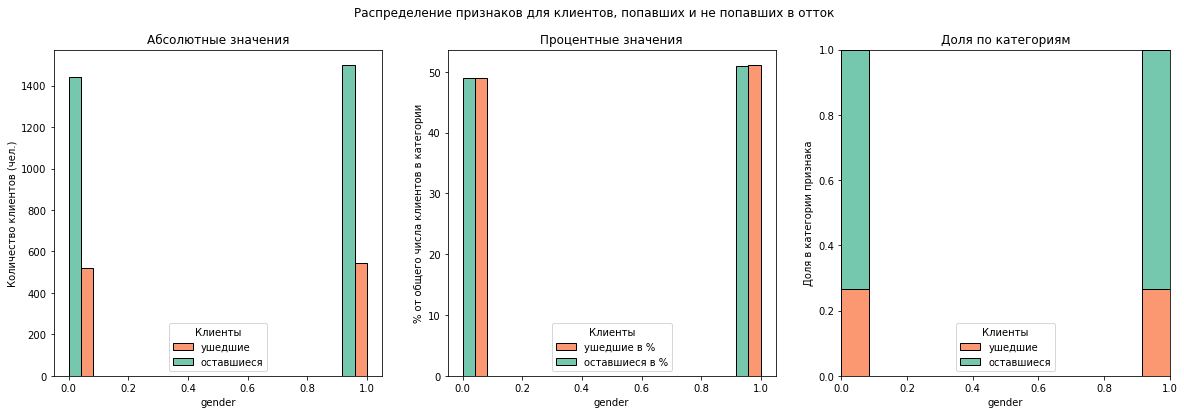

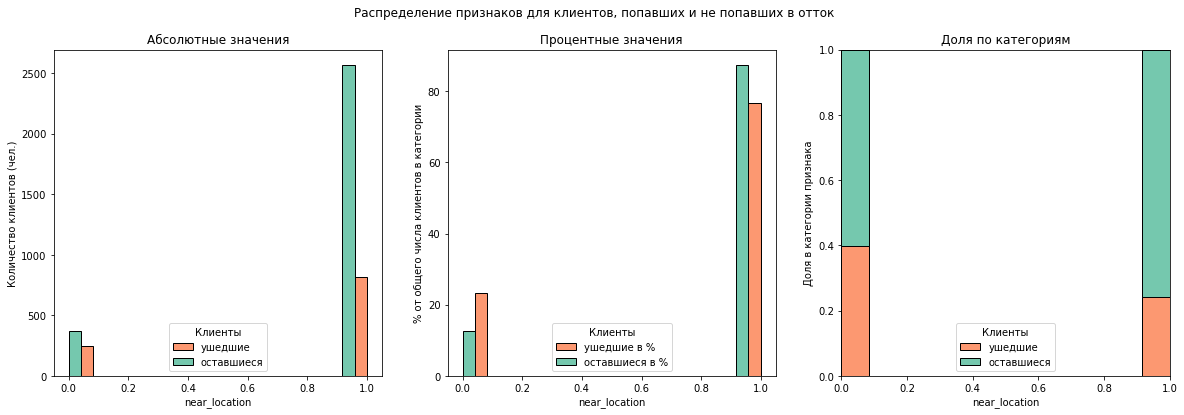

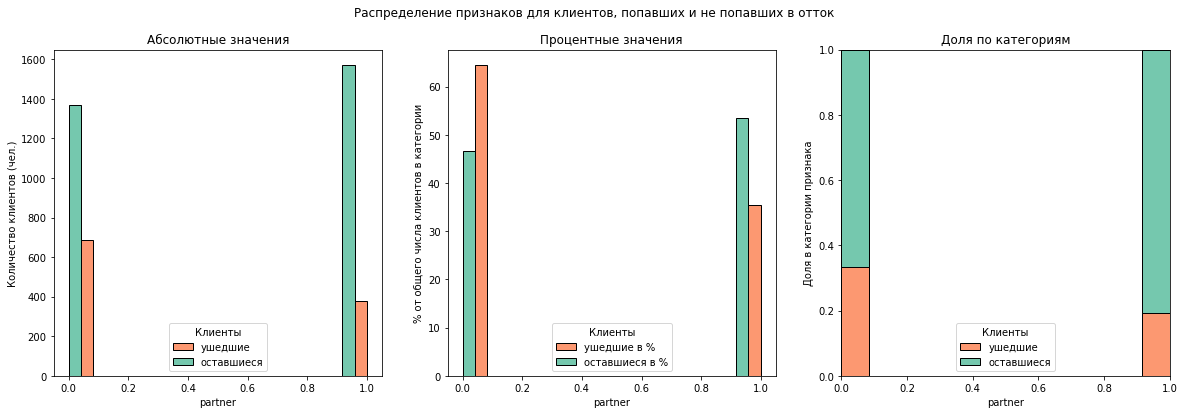

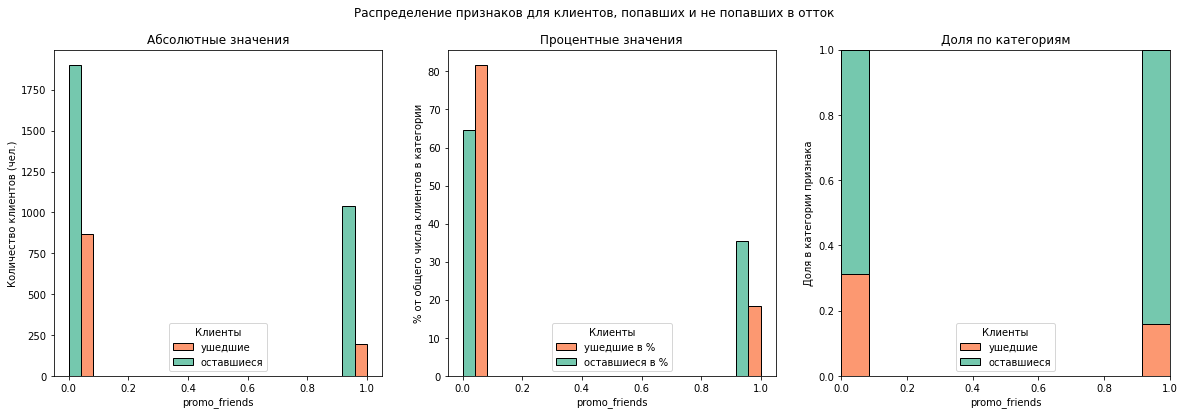

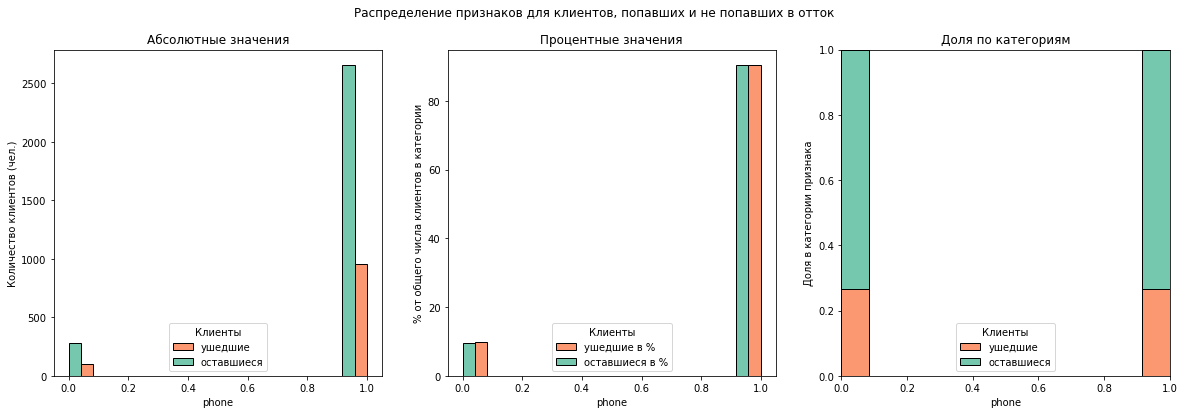

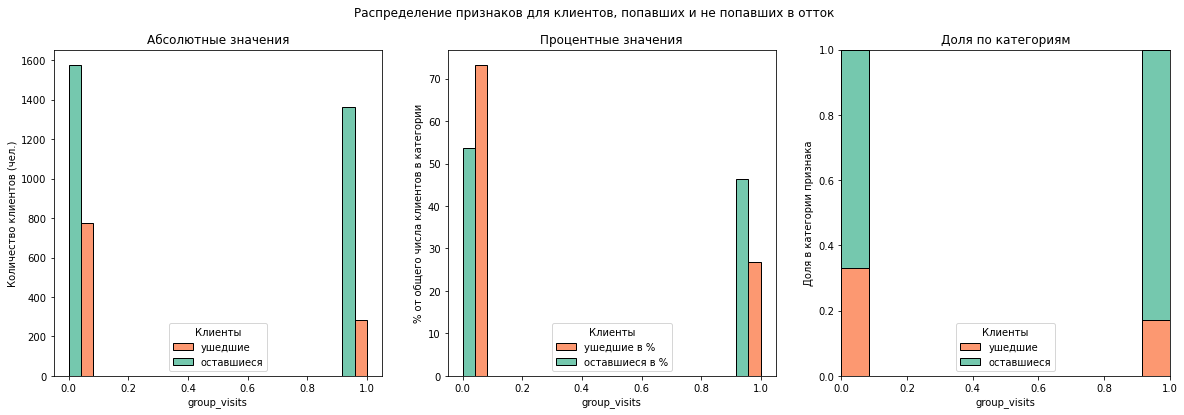

In [17]:
for _ in column_binary_list_plot:
    attribute_plots(_, False, 'lower center', 'dodge', 'dodge', 'fill', 0.9)

Основные выводы по распределению первого набора признаков:

* мужчины и женщины в выборке представлены в равных пропорциях, их отток также составляет равные доли.
* свыше 80% клиентов проживают или работают в районе, где находится фитнес-центр. Меньше четверти из них попали в отток. Для живущих/работающих вне района расположения фитнес-центра отток составляет около 40%.
* клиенты, участвующие и не участвующие в партнёрских программах фитнес-центра, представлены в равных долях. Отток клиентов из числа организаций-партнёров равен около 20%, для независимых клиентов - 33%.
* около 30% клиентов пришло в фитнес-центр по промо-коду, из них в отток ушло около 16%. Отток из числа клиентов без промо-кода составил более 30%.
* наличие/отсутствие контактного телефона не оказывает влияние на отток клиентов.
* факт посещения групповых занятий зафиксирован в 40% случаев, при этом доля ушедших клиентов из этой категории в два раза меньше, чем из группы, не посещавших групповые занятия.

Выведем гистограммы для второго списка признаков:

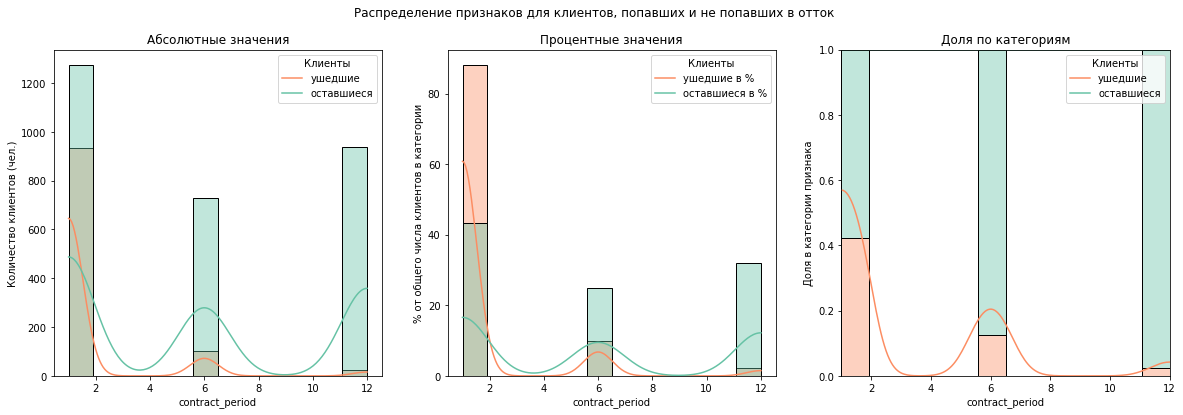

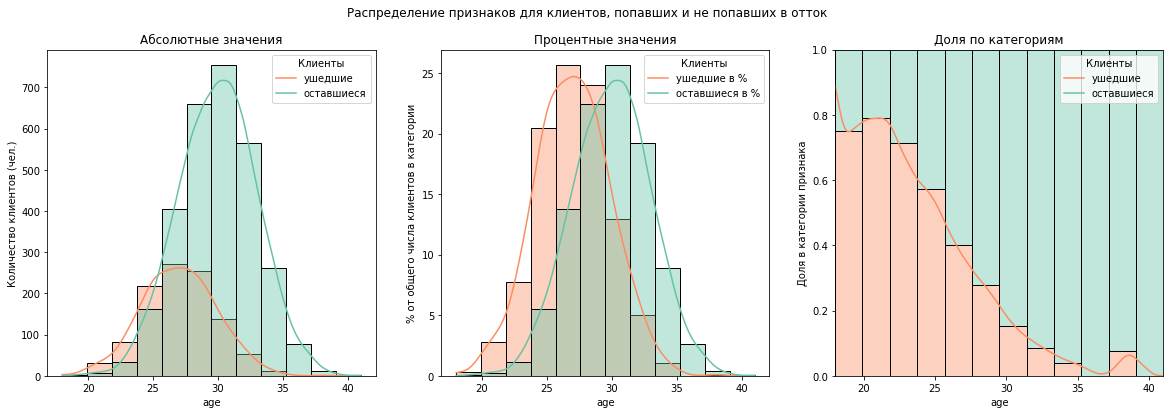

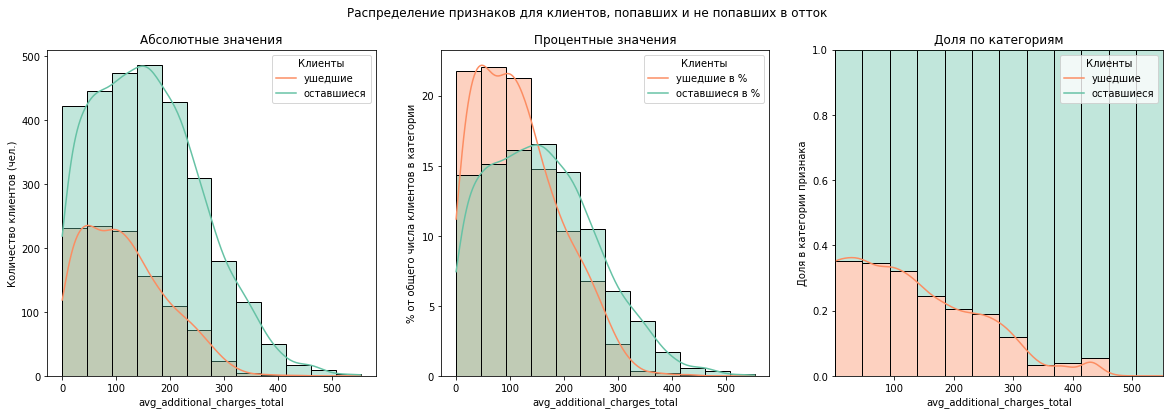

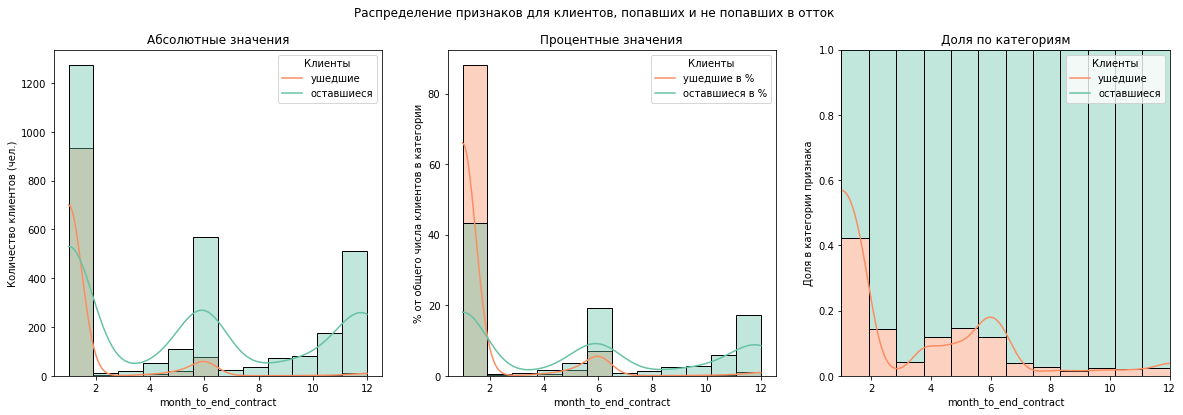

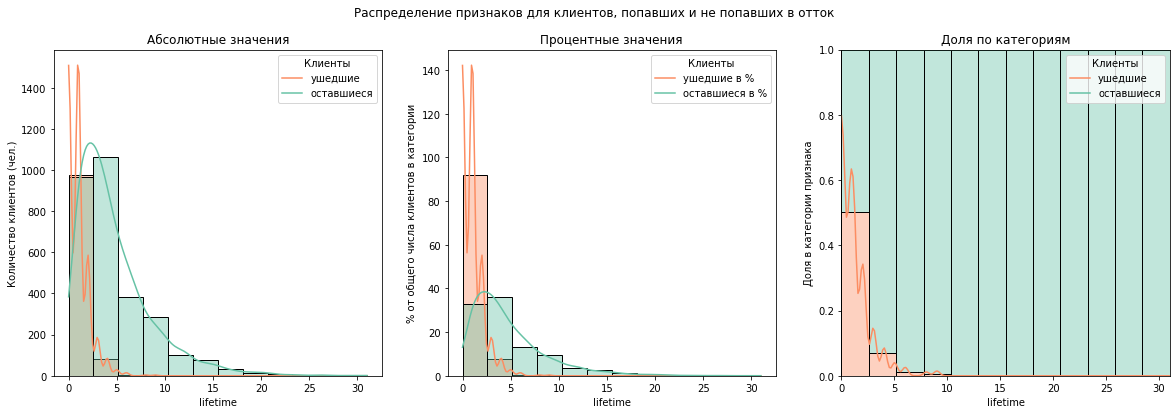

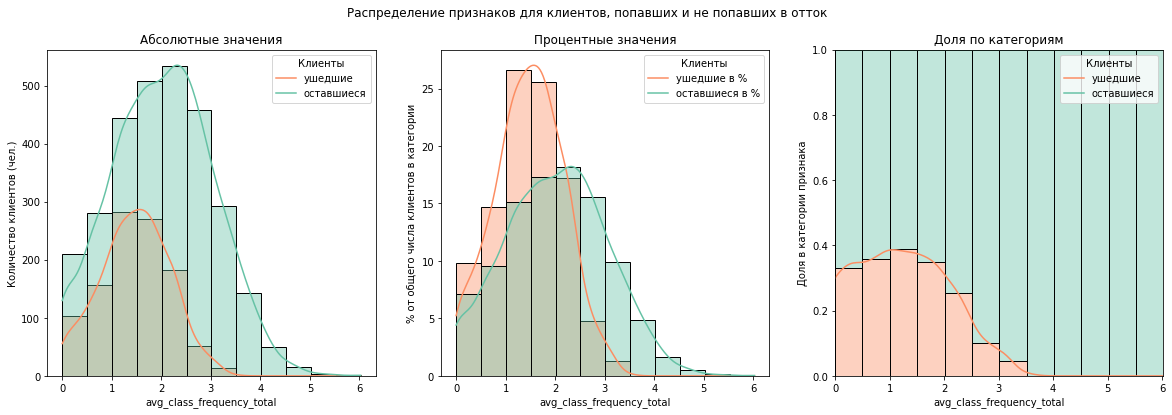

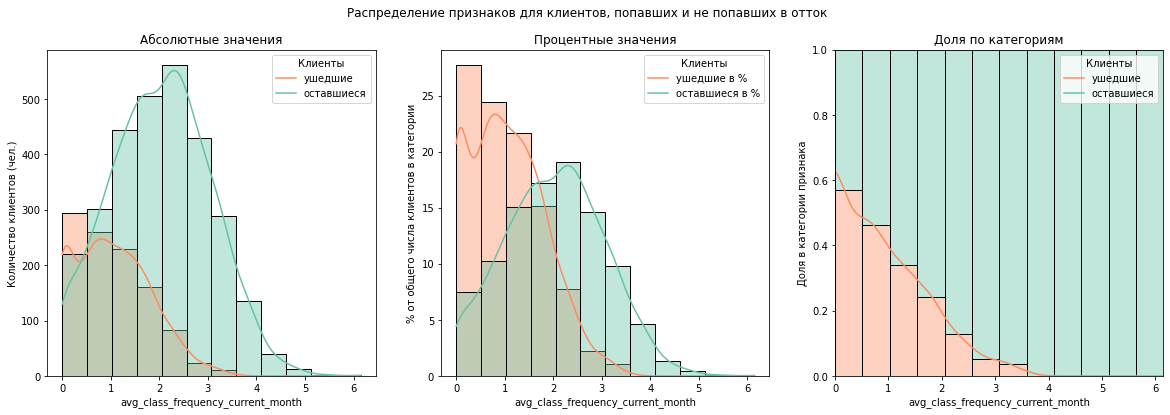

In [18]:
for _ in column_values_list_plot:
    attribute_plots(_, True, 'upper right', 'layer', 'layer', 'fill', 0.4)

Основные выводы по распределению второго набора признаков:
* 1 месяц - наиболее популярная длительность текущего действующего абонемента среди клиентов. Для неё же и характерен максимальный отток. Наиболее лояльные клиенты - это посетители с годовым абонементом.
* наиболее представленный возраст клиентов фитнес-центра: 28-32 года. Для клиентов моложе 25 лет характерен высокий уровень оттока. Клиенты старше этого порогового возраста попадают в отток значительно реже.
* частота посещений лояльных клиентов составляет более 2-х раз в неделю, в то время как для группы оттока этот показатель в среднем ниже.
* лояльные группы клиентов приносят несколько большую выручку от использования дополнительных ресурсов центра. 

Построим матрицу корреляций значений признаков с целью проверки наличия ярко выраженной линейной зависимости между признаками:

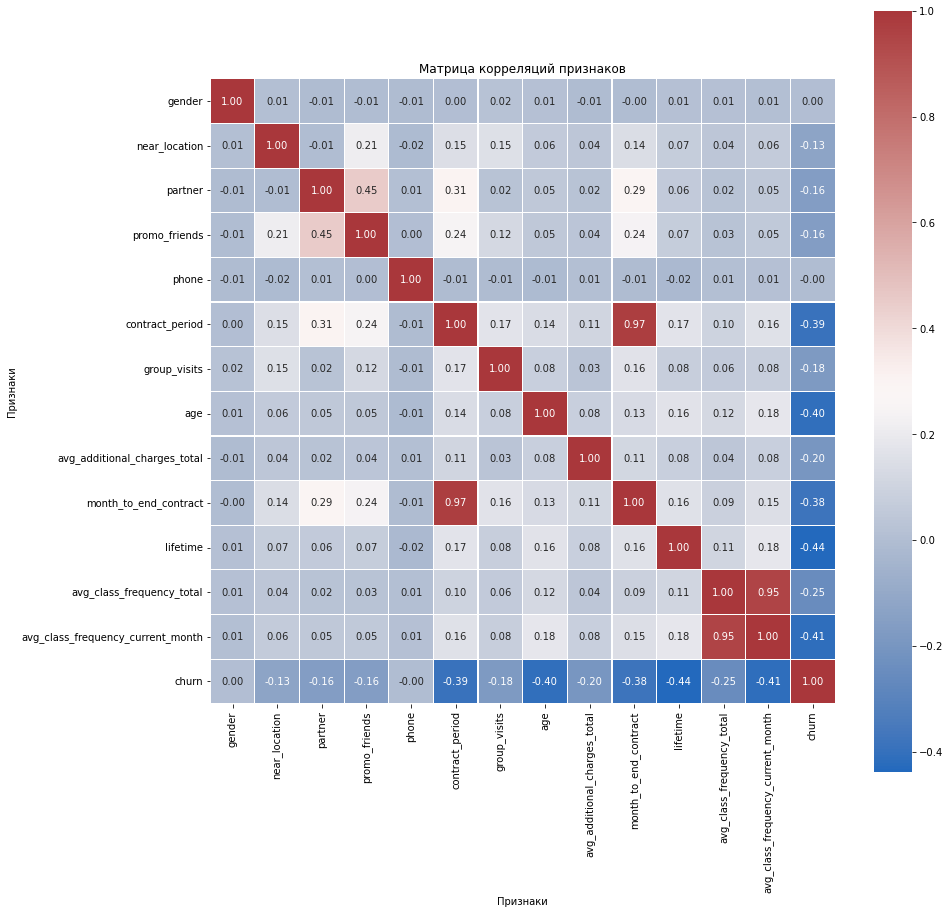

In [19]:
plt.figure(figsize=(14,14))

g = sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, linewidths=.1, cmap='vlag')
g.set_title('Матрица корреляций признаков')
g.set_xlabel('Признаки')
g.set_ylabel('Признаки')

plt.show()

Из графического представления матрицы корреляции видно, что в датасете присутствуют линейно зависимые признаки. Это наблюдается в сильной корреляции между двумя парами признаков:
* длительностью текущего действующего абонемента (*contract_period*) и сроком до окончания текущего действующего абонемента
(*month_to_end_contract*), коэффициент корреляции 0.97,
* средней частотой посещений в неделю за все время с начала действия абонемента (*avg_class_frequency_total*) и   средней частотой посещений в неделю за предыдущий месяц (avg_class_frequency_current_month), коэффициент корреляции 0.95.

При построении моделей в следующем разделе оценим какое влияние окажет удаление двух признаков 'month_to_end_contract' и 'avg_class_frequency_current_month' на качество моделей.

## Построение модели прогнозирования оттока клиентов

В данном разделе построим модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. 

Обучим модели используя алгоритмы:
* логистической регрессии,
* "случайный лес".

Оценим метрики для обеих моделей и проведем по ним сравнительный анализ моделей.

### Алгоритм логистической регрессии

#### Целевая переменная

Наглядно представим целевую переменную *churn*:

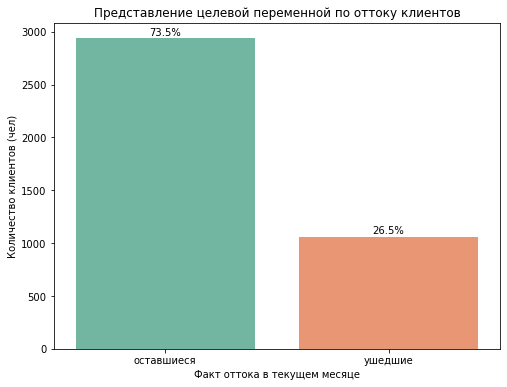

In [20]:
plt.figure(figsize=(8, 6))
g = sns.countplot(x='churn', data = df, palette='Set2')

lables = ['оставшиеся', 'ушедшие']
g.set_xticklabels(lables)
g.set_title('Представление целевой переменной по оттоку клиентов')
g.set_ylabel('Количество клиентов (чел)')
g.set_xlabel('Факт оттока в текущем месяце')

total = len(df)

for p in g.patches:
    
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x_value = p.get_x() + p.get_width() / 2
    y_value = p.get_height()
    g.annotate(percentage, (x_value, y_value), ha='center', va='center')

#### Формирование обучающей и валидационной выборки. Обучение моделей и их сравнение.

Разделим данные исходного датасета:
* на признаки (матрица X), в первом случае исключив два сильно скоррелированных входа *month_to_end_contract* и *avg_class_frequency_current_month*, а во втором оставив их 
* целевую переменную (y) *churn* - факт оттока в текущем месяце.

Для алгоритмов логистической регрессии и "случайного леса" взвешивание признаков не используется, поэтому ниже для обучения моделей будут использоваться не масштабируемые данные.

Далее, разобьём данные на обучающую и валидационную выборку. Исследуемый набор данных содержит 4000 строк, что относительно немного с учётом 11 параметров. Разделим выборку на две части в соотношении 70% учебных данных и 30% проверочных данных (такое соотношение позволяет обучить модель на достаточно большом количестве данных, но в лучшей степени оценить валидность модели):

In [21]:
dropped_columns_target = ['churn']
dropped_columns_strong_correlation = ['churn', 'month_to_end_contract', 'avg_class_frequency_current_month']

In [22]:
def lr_model_comparison(list):
    
    # разделение данных на признаки и целевую переменную
    X = df.drop(list, axis=1)
    y = df['churn']
    
    # разделение данных на обучающую и валидационную выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    
    # обучение модели
    lr_model = LogisticRegression(solver='liblinear', C=1)
    lr_model.fit(X_train, y_train)
    
    # вывод результатов и значений метрик
    lr_predictions = lr_model.predict(X_test)
    lr_probabilities = lr_model.predict_proba(X_test)[:,1]
    
    print('Доля правильных ответов (accuracy): {:.3f}'.format(accuracy_score(y_test, lr_predictions)))
    print('Точность (precision): {:.3f}'.format(precision_score(y_test, lr_predictions)))
    print('Полнота (recall): {:.3f}'.format(recall_score(y_test, lr_predictions)))
    print('F1: {:.3f}'.format(f1_score(y_test, lr_predictions)))
    print('Площадь под кривой ошибок (ROC_AUC): {:.3f}'.format(roc_auc_score(y_test, lr_probabilities)))

В первом случае, передадим функции список признаков, исключив из обучающей выборки два сильно скоррелированных, и выведем метрики модели:

In [23]:
lr_model_comparison(dropped_columns_strong_correlation)

Доля правильных ответов (accuracy): 0.887
Точность (precision): 0.794
Полнота (recall): 0.774
F1: 0.783
Площадь под кривой ошибок (ROC_AUC): 0.946


Во втором случае, передадим функции весь список признаков, вне зависимости от степени корреляции между ними, и выведем метрики модели:

In [24]:
lr_model_comparison(dropped_columns_target)

Доля правильных ответов (accuracy): 0.922
Точность (precision): 0.881
Полнота (recall): 0.818
F1: 0.848
Площадь под кривой ошибок (ROC_AUC): 0.972


Сравнивая значения метрик, отчетливо видно, что сохранение всех признаков датасета улучшает качественные характеристики модели. 

Из показателей метрик, оценивающих результаты работы модели логистической регрессии можно сделать следующие выводы:
* Несмотря на относительно высокую долю правильных ответов, метрика *accuracy* требует удовлетворения условия баланса классов, поэтому в качестве надёжного показателя она не сильно применима, т.к. по ряду признаков классы в датасете не сбалансированы. 
* Метрика *precision* указывает на долю правильных ответов только среди целевого класса. Другими словами, её можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными. Для сравниваемых моделей этот показатель равен 0.794 (после удаления сильно коррелирующих признаков) и 0.881 (без удаления сильно коррелирующих признаков).
* Метрика *recall* нацелена на минимизацию противоположных рисков и показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Для сравниваемых моделей этот показатель равен 0.774 и 0.814, соответственно.
* F1-мера - сводная метрика, учитывающая баланс между метриками *precision* и *recall*. Для сравниваемых логистических моделей он равен 0.783 и 0.846, что является сбалансированным результатом во избежание противоположных рисков, присущих двум предыдущим метрикам. В дальнейшем, эта метрика будет использоваться как одна из определяющих качество модели.
* Площадь под кривой ошибок (ROC_AUC) - критерий, который можно интерпретировать как вероятность того, что случайно выбранный positive объект будет ранжирован классификатором выше (будет иметь более высокую вероятность быть positive), чем случайно выбранный negative объект. ROC-AUC является метрикой классификации и для сравниваемых моделей равна 0.946 и 0.972.

#### Определение оптимального значения параметра регуляризации С и оценка модели

В дальнейших исследованиях будем использовать модель, сохранившую все признаки:

In [25]:
X = df.drop(dropped_columns_target, axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

lr_model = LogisticRegression(solver='liblinear', C=1)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

# f1 используется в качестве оптимизированной метрики качества модели
f1 = f1_score(y_test, lr_predictions)

Проведём регуляризацию выбранной модели логистической регрессии. Под регуляризацией в машинном обучении понимают использование методов добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение модели. В алгоритме логистической регрессии для нашей модели, по умолчанию использовался параметр регуляризации С=1. Проверим насколько он является оптимальным. С этой целью, используя кросс-валидацию (статистический метод, применяемый для оценки модели машинного обучения на независимых данных), определим близкий к оптимальному параметр регуляризации:

In [26]:
# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# интервал значений параметра регуляризации, перебираемый по логарифмической сетке
c_values = pd.Series(np.logspace(-4, 4, num = 17))

# оптимизация
lr_searcher = (LogisticRegressionCV(Cs=c_values,
                                    max_iter = 1000,
                                    cv=skf,
                                    random_state=0,
                                    scoring = 'f1',
                                    solver='liblinear',
                                    tol=0.0001)
               .fit(X_train, y_train)
              )

Выведем график зависимости метрики F1 от параметра регуляризации С:

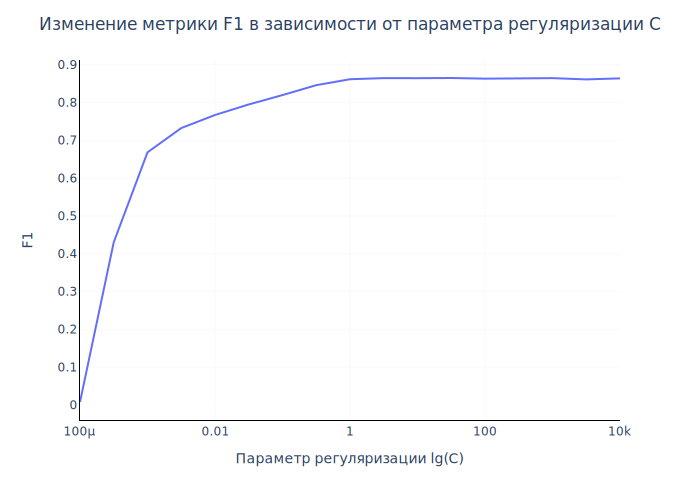

In [27]:
# вывод графика 
fig = px.line(
    x=c_values,
    y=np.mean(lr_searcher.scores_[1], axis=0),
             labels={'x': 'Значение параметра регуляризации', 'y': 'F1'}, log_x=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Изменение метрики F1 в зависимости от параметра регуляризации С',
                  xaxis_title='Параметр регуляризации lg(C)',
                  yaxis_title='F1',
                  plot_bgcolor='#ffffff'
                 )

fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

Воспользуемся обученной моделью, чтобы обновить прогноз:

In [28]:
lr_searcher_predictions = lr_searcher.predict(X_test)
lr_searcher_probabilities = lr_searcher.predict_proba(X_test)[:, 1]

In [29]:
print('Оптимальный параметр регуляризации С:', lr_searcher.C_.round(1))

Оптимальный параметр регуляризации С: [31.6]


Приведём обновленные метрики, оформленные в виде кастомной функции, для предложенного алгоритмом оптимального параметра регуляризации С:

In [30]:
def print_metrics(predictions, probabilities):
    print('Доля правильных ответов (accuracy): {:.3f}'.format(accuracy_score(y_test, predictions)))
    print('Точность (precision): {:.3f}'.format(precision_score(y_test, predictions)))
    print('Полнота (recall): {:.3f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.3f}'.format(f1_score(y_test, predictions)))
    print('Площадь под кривой ошибок (ROC_AUC): {:.3f}'.format(roc_auc_score(y_test, probabilities)))

In [31]:
print_metrics(lr_searcher_predictions, lr_searcher_probabilities)

Доля правильных ответов (accuracy): 0.927
Точность (precision): 0.878
Полнота (recall): 0.840
F1: 0.859
Площадь под кривой ошибок (ROC_AUC): 0.972


Метрики свидетельствуют, что за счёт оптимизации параметра регуляризации, можно достигнуть несколько лучших показателей предсказания математической моделью с учётом интересующих нас метрик.  

### Алгоритм "случайный лес"

#### Обучение модели и использование метрик

Зададим алгоритм для новой модели на основе алгоритма "случайный лес", где *n_estimators* — число «деревьев» в «случайном лесу», предлагаемое по умолчанию:

In [32]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса:

In [33]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Воспользуемся обученной моделью, чтобы сделать прогнозы:

In [34]:
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Выведем значения метрик для полученного прогноза:

In [35]:
print_metrics(rf_predictions, rf_probabilities)

Доля правильных ответов (accuracy): 0.912
Точность (precision): 0.871
Полнота (recall): 0.783
F1: 0.825
Площадь под кривой ошибок (ROC_AUC): 0.965


На основании показателей метрик, оценивающих результаты работы алгоритма "случайный лес", сделаем выводы о его работе и сравним с показателями логистической регрессии:
* в случае использования параметров по умолчанию, предсказания модели "случайный лес" характеризуются несколько меньшими значениями и балансом метрик *precision* и *recall*.
* метрика ROC_AUC для "случайного леса" также несколько ниже, чем для логистической регрессии, что может быть связано с необходимостью дополнительной подстройки модели. 

#### Автоматический подбор параметров для модели и её оценка

Одним из способов улучшить результаты предсказания моделей является автоматический подбор параметров для моделей машинного обучения. Используем в работе модуль *GridSearchCV* библиотеки sklearn, который находит наилучшие параметры, путем создания модели для каждой возможной комбинации параметров.

Объявим классификатор RandomForest без внесения в него параметров:

In [36]:
clf = RandomForestClassifier(random_state = 0)

На примере числа "деревьев в лесу" (*n_estimators*) и vfrcbvfkmyjq uke,bys ('max_depth') оптимизируем нашу модель "случайного леса". Интервал значений зададаим условно, с целью минимизировать время вычислений: 

In [37]:
parameters = {'n_estimators': range (100, 200, 10), 
             'max_depth': range (9, 11, 1)}

In [38]:
# время расчёта около 1 минуты
grid = GridSearchCV(clf, parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(9, 11),
                         'n_estimators': range(100, 200, 10)})

In [39]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 130}

In [40]:
rf_model_opt = (
    RandomForestClassifier(n_estimators = grid.best_params_['n_estimators'],
                           max_depth = grid.best_params_['max_depth'],
                           random_state = 0)
)

rf_model_opt.fit(X_train, y_train)

rf_predictions_opt = rf_model_opt.predict(X_test)
rf_probabilities_opt = rf_model_opt.predict_proba(X_test)[:, 1]

In [41]:
print_metrics(rf_predictions_opt, rf_probabilities_opt)

Доля правильных ответов (accuracy): 0.909
Точность (precision): 0.862
Полнота (recall): 0.783
F1: 0.820
Площадь под кривой ошибок (ROC_AUC): 0.966


Результаты предварительной оптимизации показывают, что производительность модели близка к исходной и требуется дополнительное изучение параметров настройки модели, для её подстройки.

### Оценка важности признаков для моделей

#### Логистическая регрессия

Оценим важность признаков для алгоритма логистической регрессии в предсказании оттока клиентов определив коэффициенты признаков логистической регрессии:

In [42]:
lr_coefs = np.abs(lr_model.coef_[0])
lr_importances = (pd.DataFrame(list(zip(X.columns, lr_coefs)), 
                               columns =['Признак', 'Важность'])
                  .sort_values(by='Важность', ascending=False)
                  .reset_index(drop=True)
                 )
lr_importances

,Признак,Важность
0,avg_class_frequency_current_month,3.709776
1,avg_class_frequency_total,3.092830
2,lifetime,0.930597
3,group_visits,0.696587
4,phone,0.509122
5,promo_friends,0.268271
6,contract_period,0.201272
7,age,0.200279
8,near_location,0.103809
9,month_to_end_contract,0.077099


Графически отобразим важность признаков для модели, при этом отметим, что она не обязательно отражает такую же степень влияния каждого признака на отток клиентов:

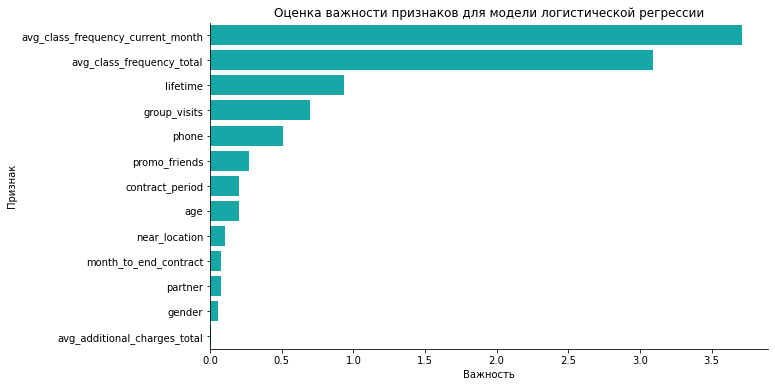

In [43]:
plt.figure(figsize=(10, 6))

g = sns.barplot(x='Важность', y='Признак', data = lr_importances, color = 'c')
g.set_title('Оценка важности признаков для модели логистической регрессии')
sns.despine(left=False, bottom=False, right=True)

plt.show()

К наиболее важным признакам модель отнесла среднюю частоту посещений, время с момента первого обращения и факт посещения групповых занятий в  фитнес-центре).

#### "Случайный лес"

Важность признаков для алгоритма "случайный лес" в предсказании оттока клиентов оценим при помощи метода перестановки (*permutation importance*) библиотеки *scikit-learn*. Принцип работы алгоритма заключается в произвольной перетасовке одного столбца в наборе датасета валидации, оставив все остальные столбцы нетронутыми. Признак считается «важным», если точность модели падает и его изменение вызывает увеличение ошибок. Признак считается «неважным», если перетасовка его значений не влияет на точность предсказания модели.

In [44]:
rf_result = permutation_importance(rf_model, X_test, y_test, random_state=0)

In [45]:
rf_importances = (pd.DataFrame(list(zip(X.columns, rf_result.importances_mean)),
                               columns =['Признак', 'Важность'])
                  .sort_values(by='Важность', ascending=False)
                  .reset_index(drop=True)
                 )

rf_importances

,Признак,Важность
0,lifetime,0.102667
1,avg_class_frequency_current_month,0.076000
2,age,0.030667
3,avg_class_frequency_total,0.029500
4,contract_period,0.012333
5,month_to_end_contract,0.009000
6,avg_additional_charges_total,0.007833
7,group_visits,0.007000
8,gender,0.001667
9,near_location,0.001500


Представим степень важности признаков для модели на диаграмме: 

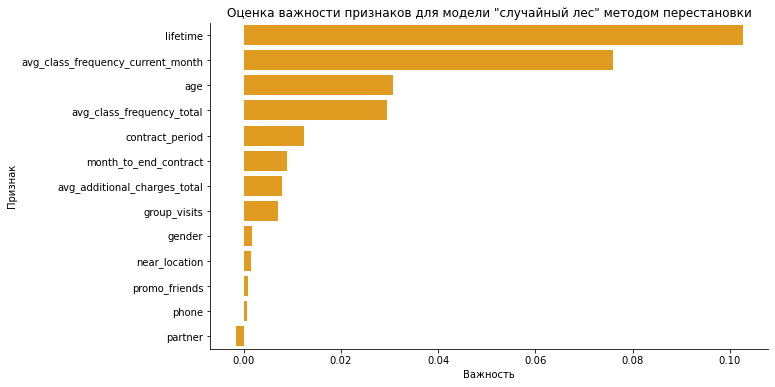

In [46]:
plt.figure(figsize=(10, 6))

g = sns.barplot(x='Важность', y='Признак', data = rf_importances, color = 'orange')
g.set_title('Оценка важности признаков для модели "случайный лес" методом перестановки')
sns.despine(left=False, bottom=False, right=True)

plt.show()

Признаки сверху (время с момента первого обращения в фитнес-центр, длительность текущего действующего абонемента, возраст) воспринимаются моделью как наиболее важные. Некоторые веса отрицательны. Это связано с тем, что в этих случаях прогнозы по перетасованным данным оказались более точными, чем реальные данные.

## Кластеризация клиентов

### Стандартизация данных

Стандартизация приводит значение признака к виду стандартного нормального распределения: для каждого наблюдения из исходного значения признака вычитается среднее, а полученная разность делится на стандартное отклонение. Применение стандартизации обязательно для линейной регрессии, кластеризации и методов, строящихся на взаимных расстояниях между объектами.

In [47]:
scaler = StandardScaler()
scaler.fit(X)

# преобразование обучающего и валидационного наборов данных
X_sc = scaler.transform(X)

### Матрица расстояний признаков и дендрограмма

Создадим таблицу «связок» между объектами с использованием класса модели кластеризации *linkage()* и алгоритма минимальной дисперсии Уорда *'ward'*.  Критерий выбора пары кластеров для объединения на каждом шаге основан на оптимальном значении целевой функции, в случае использования метода Уорда - целевая функция представляет собой сумму ошибок квадратов.

In [48]:
linked = linkage(X_sc, method = 'ward')

Визуализируем связь между объектами используя дендрограмму. В качестве параметров используем её усечение до уровня, когда количество "листьев" в основании не превышает 50. 

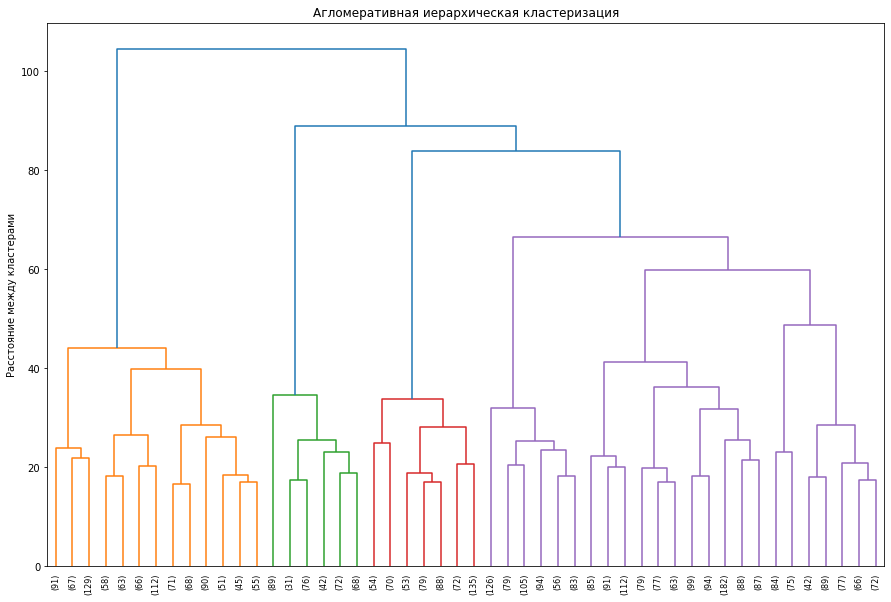

In [49]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', truncate_mode='lastp', p=50)
plt.title('Агломеративная иерархическая кластеризация')
plt.ylabel('Расстояние между кластерами')
plt.show()

Предложенное моделью кластеризации оптимальное число кластеров равно 4, которое и будет использоваться в последующих расчётах с использованием алгоритма K-Means.

### Модель кластеризации K-Means

Зададим число кластеров, равное 4, полученное из данных дендрограммы:

In [50]:
km = KMeans(n_clusters = 4, random_state = 0) 

Применим алгоритм K-Means к данным и сформируем вектор кластеров: 

In [51]:
labels = km.fit_predict(X_sc)

Cохраним метки кластера в поле нашего датасета:

In [52]:
X['cluster_km'] = labels

Определим статистику по средним значениям признаков по кластеру:

In [53]:
cluster_mean = X.groupby(['cluster_km']).mean()
display(cluster_mean)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592


Из результатов, представленных в таблице средних значений признаков для каждого кластера видно:
* пол и возраст клиентов не являются отличительной чертой формирования кластеров
* признаки, влияющие на кластеризацию: локация центра относительно места проживания/работы клиента, участие организации в партнёрской программе фитнес-центра, промо-код, длительность контракта, групповые занятия, частота посещений

Отобразим на графике попарного сочетания признаков получившиеся кластеры для пары "возраст" - "средняя частота посещений в неделю за все время":

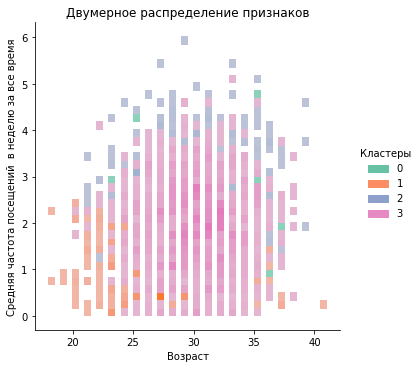

In [54]:
g = sns.displot(data=X, x='age', y='avg_class_frequency_total', hue='cluster_km', palette='Set2')

plt.title('Двумерное распределение признаков')
plt.ylabel('Средняя частота посещений  в неделю за все время')
plt.xlabel('Возраст')

g._legend.set_title('Кластеры')

plt.show()

Из графика видно, что для выбранных признаков кластеры накладываются друг на друга, что не позволяет выделить чёткую зависимость между двумя выбранными признаками в разрезе классов.

Подробнее рассмотрим распределения признаков для кластеров, предварительно присоединив целевую переменную, для последующего определения доли оттока:

In [55]:
df_joined = df.join(X['cluster_km'])

In [56]:
def attributes_distribution_by_cluster(column, kde_option):
      
    sns.displot(x=column,
                data=df_joined,
                col='cluster_km',
                stat='density',
                kde=kde_option,
                legend=False,
                color='#66cc66'
                )

    plt.suptitle('Распределение признаков для каждого кластера', y=1.10)
    #plt.legend(title='Клиенты', labels=['ушедшие', 'оставшиеся'])
    plt.show()

Построим гистограммы распределения плотностей для первого набора признаков для каждого кластера:

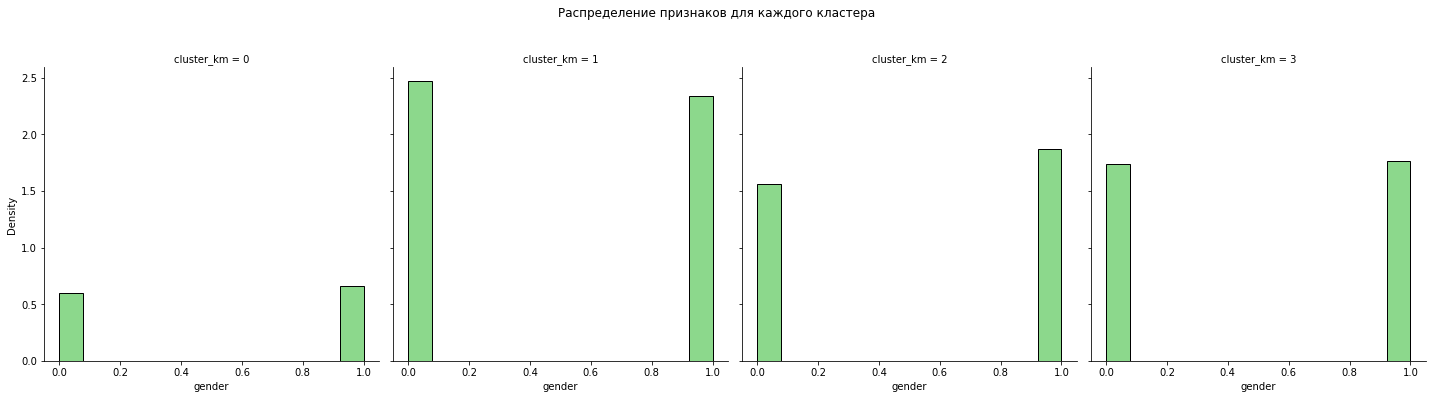

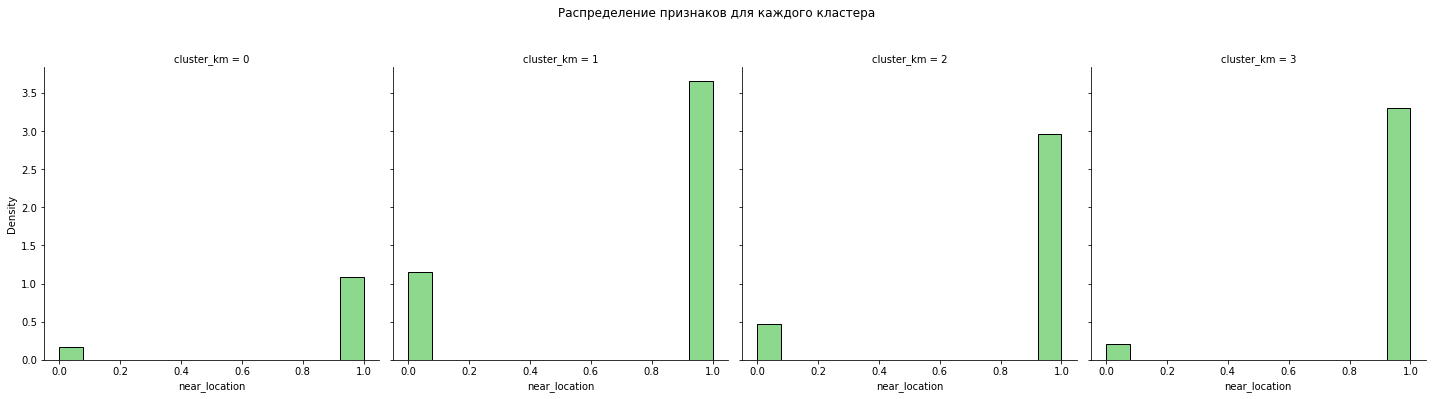

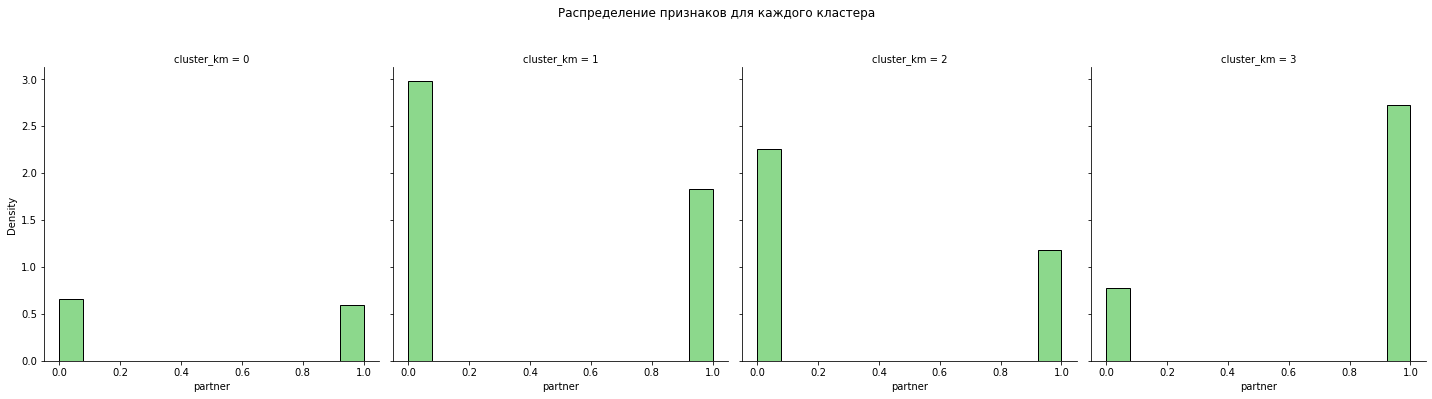

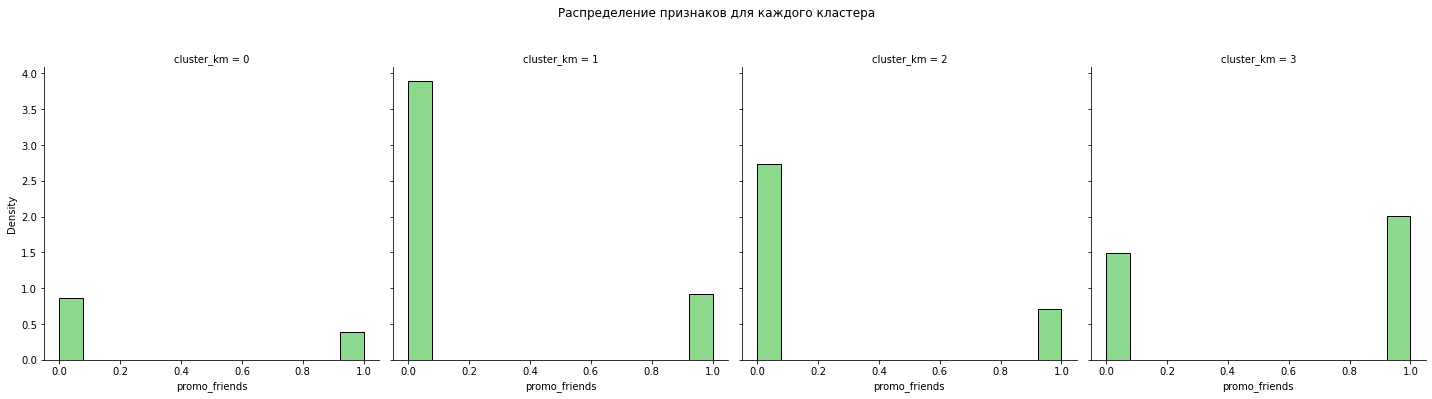

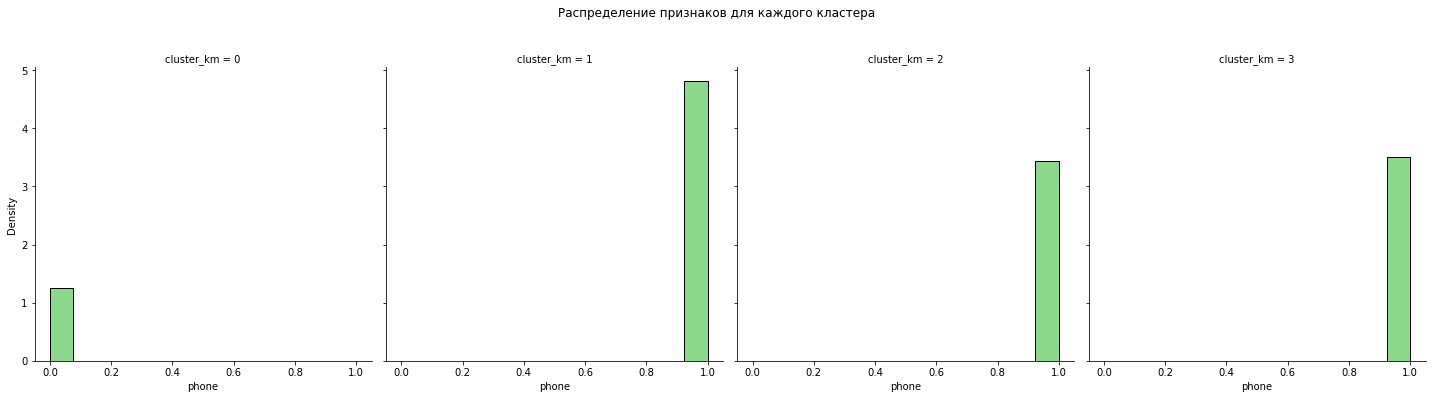

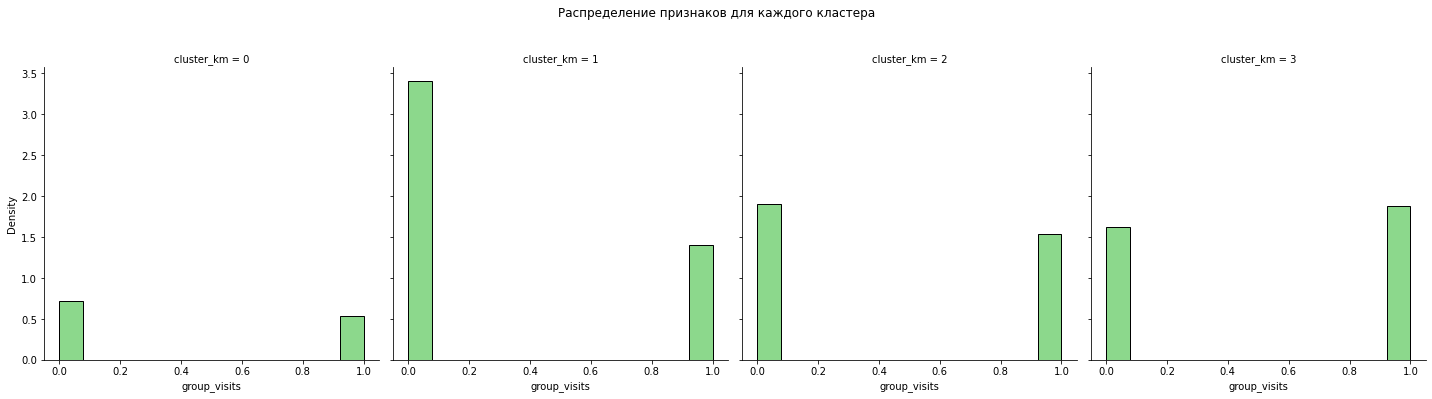

In [57]:
for _ in column_binary_list_plot:
    attributes_distribution_by_cluster(_, False)

Построим гистограммы распределения (в абсолютных значениях числа клиентов, учитывая целевую переменную оттока) для второго набора признаков в разрезе сформированных моделью кластеров:

In [58]:
X_column_values_list_plot = (['contract_period',
                            'age',
                            'avg_additional_charges_total',
                            'lifetime',
                            'avg_class_frequency_total',
                            'month_to_end_contract',
                            'avg_class_frequency_current_month']
                           )

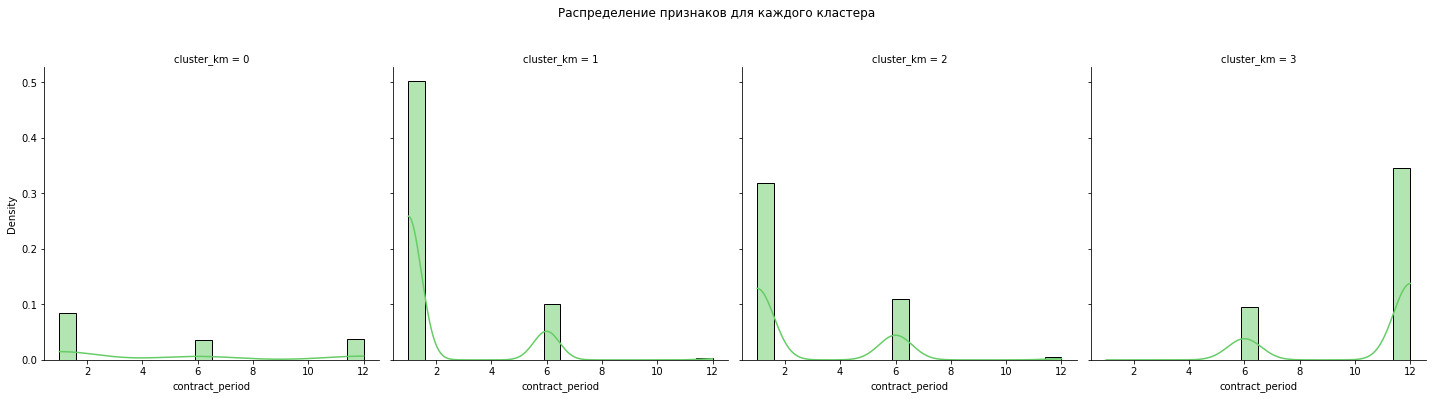

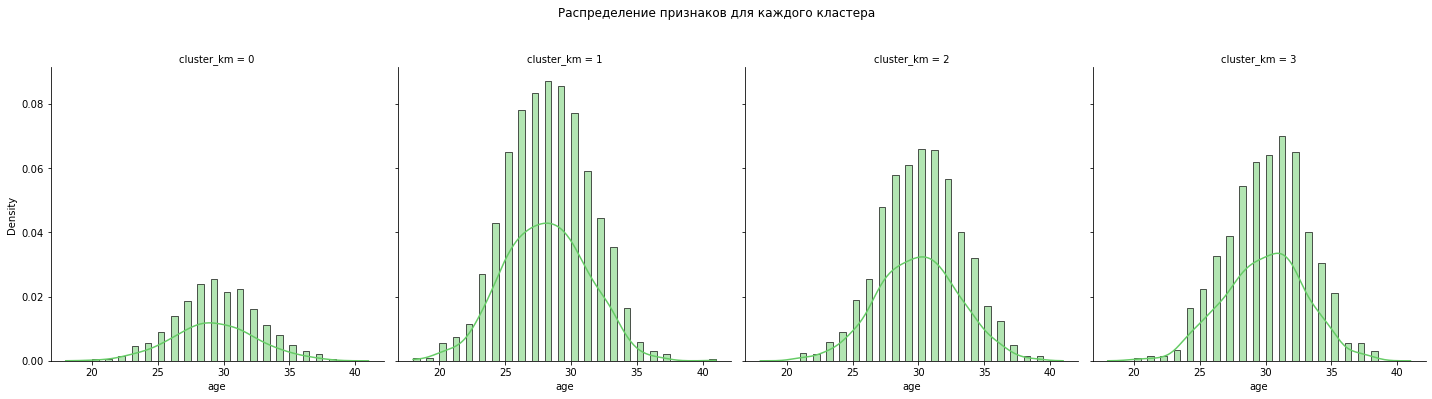

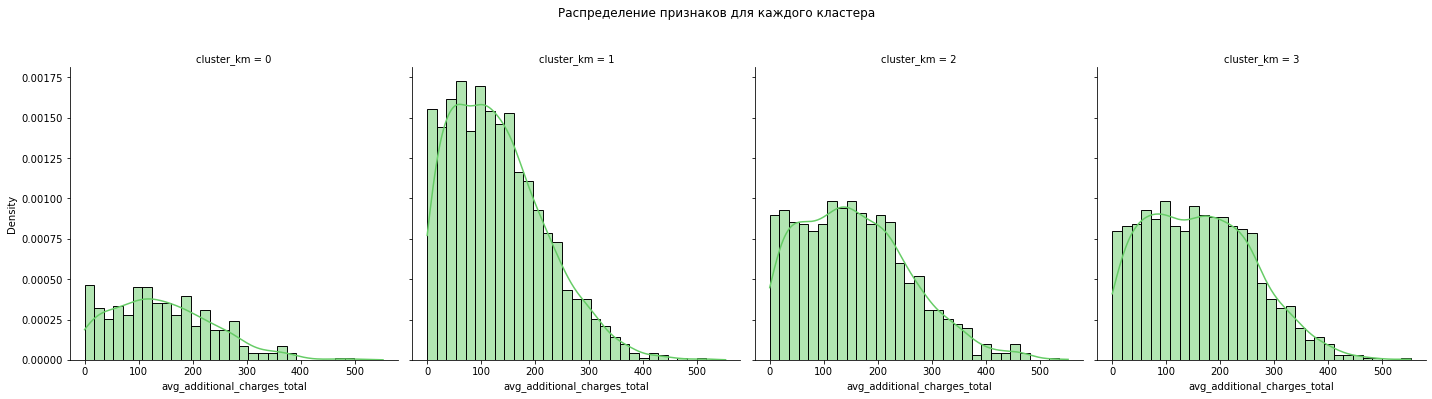

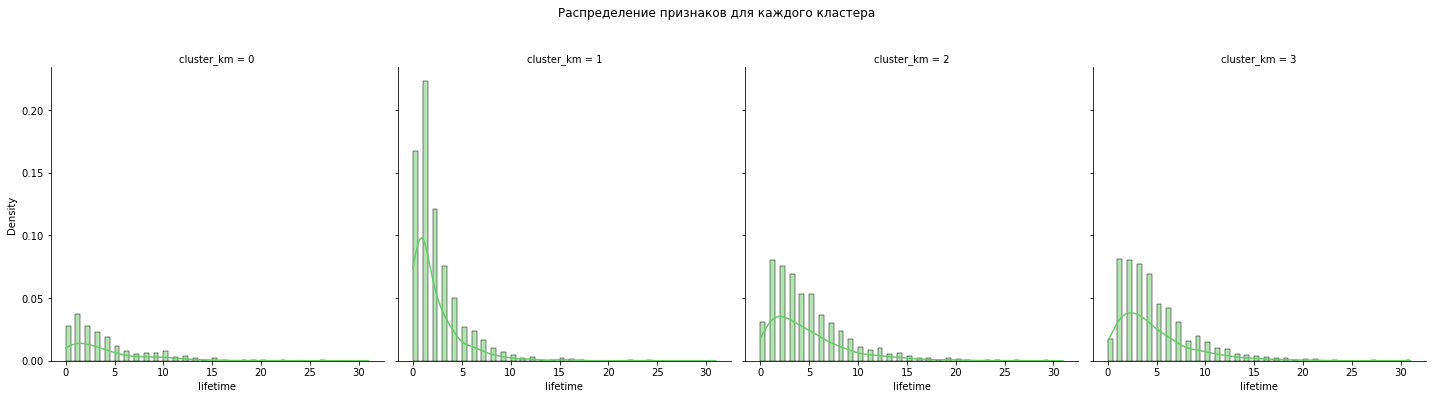

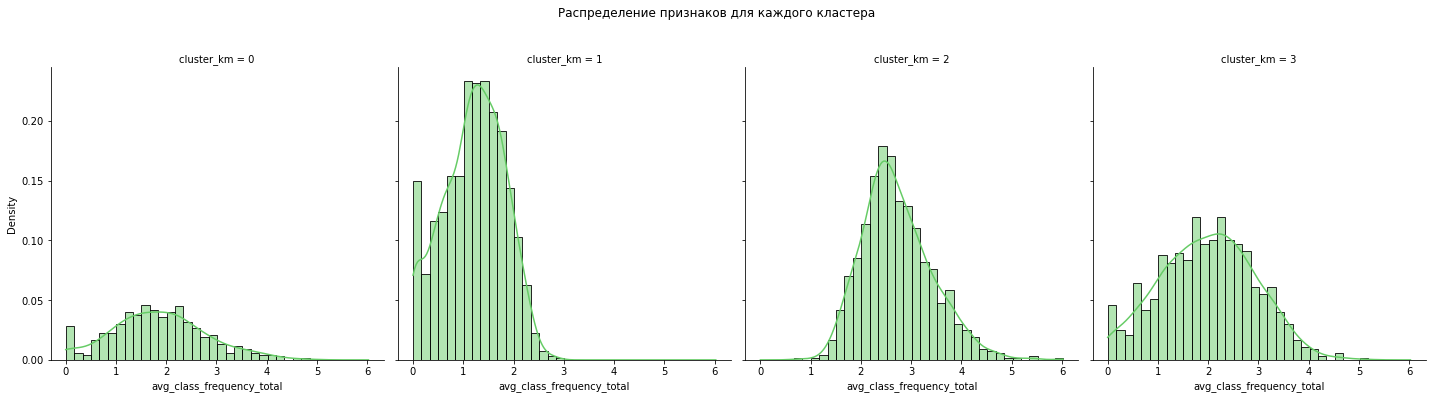

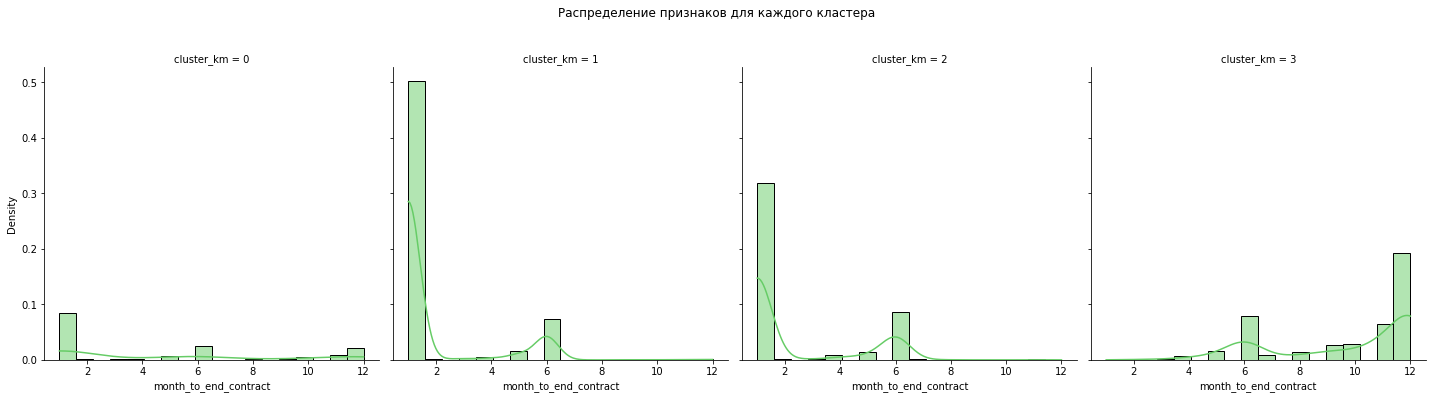

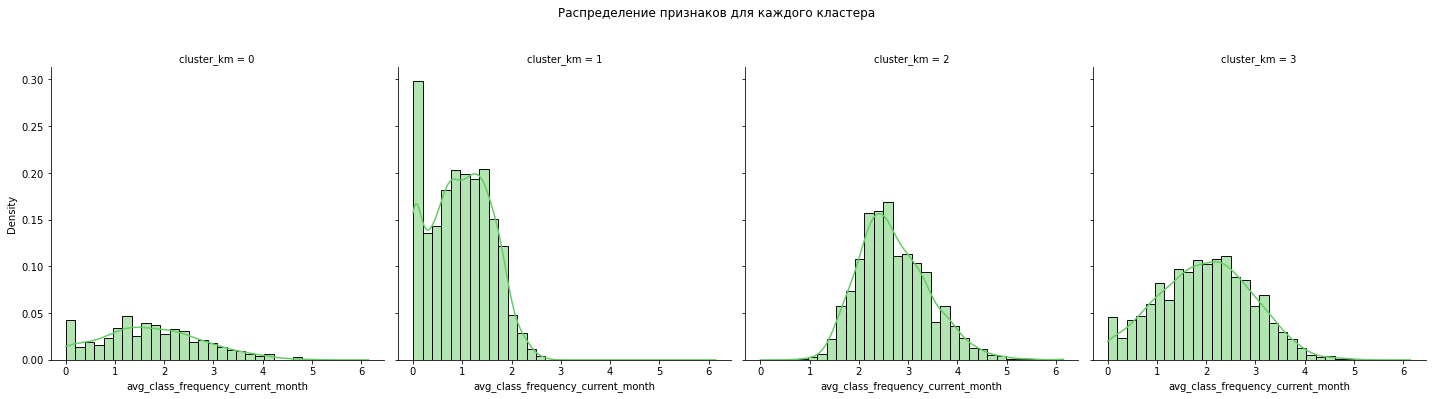

In [59]:
for _ in X_column_values_list_plot:
    attributes_distribution_by_cluster(_, True)

Можно выделить следующие отличительные особенности для сформированных кластеров:

**Кластер "0"**:
* характеризуется минимальной плотностью распределения признаков,
* большинство признаков (пол, участие в партнёрских программах, групповые посещения занятий) имеют распределение в равных соотношениях между группами,
* клиенты в своём большинстве живут или работают вблизи фитнес-центра,
* клиенты, объединённые в кластере, не предоставили контактный телефон,
* клиенты в меньшей степени пользовались акцией "приведи друга",
* превалируют среднесрочные абонементы, у большинства из них срок окончания в течение 4-х месяцев,
* средний возраст клиентов около 29 лет,
* большинство первых обращений в фитнес-центр - около 1 месяца назад.

**Кластер "1"**:
* характеризуется максимальной представительностью,
* большинство признаков варьируются в соотношениях между группами,
* женщины и мужчины представлены в равных соотношениях,
* клиенты в основном живут или работают вблизи фитнес-центра,
* практически треть клиентов не является участниками партнёрской программы,
* лишь пятая часть клиентов воспользовалась промо-акцией "приведи друга",
* кластер характеризуется низким участием в групповых занятиях,
* подавляющее число клиентов имеют абонементы с минимальным сроком действия,
* средний возраст клиентов около 28 лет,
* в большинстве случаев, срок до окончания текущего действующего абонемента составляет менее месяца, в среднем - около 2-х месяцев,
* частота посещений фитнес-центра среди всех кластеров минимальна.

**Кластер "2"**:
* женщины и мужчины представлены в менее равных соотношениях, чем в других кластерах,
* клиенты в основном живут или работают вблизи фитнес-центра,
* около трети клиентов не является участниками партнёрской программы,
* лишь пятая часть клиентов воспользовалась промо-акцией "приведи друга",
* кластер характеризуется равным распределением по участию / не участию в групповых занятиях,
* большая доля краткосрочных контрактов,
* средний возраст клиентов около 30 лет, что является одним из максимальных показателей,
* время с момента первого обращения - 4.7 месяца, что превышает показатели 0 и 1 кластеров,
* кластер характеризуется максимальной частотой посещений занятий. 

**Кластер "3"**:
* женщины и мужчины представлены в равных соотношениях,
* 95% клиентов живут или работают вблизи фитнес-центра,
* максимальный показатель среди всех кластеров по участию в партнёрской программе (77%) и в промо-акциях "приведи друга" (57%),
* лучшие показатели по посещению групповых занятий,
* длительность текущего действующего абонемента максимальна среди всех кластеров - около 11 месяцев,
* средний возраст клиентов около 30 лет, с большей долей клиентов старшего возраста в сравнении с кластерами 0 и 1,
* среднее время с момента первого обращения - около 4.7 месяца,
* превалируют годовые контракты на услуги фитнес-центра,
* кластер обеспечивает максимальную выручку от пользования дополнительных услуг фитнес-центра.

Отличительные признаки, обеспечивающие минимальный отток, будут рассмотрены в следующем разделе.

### Определение доли оттока

Определим количество клиентов в каждом кластере:

In [60]:
df_joined.groupby(['cluster_km'])['churn'].count()

cluster_km
0     386
1    1479
2    1057
3    1078
Name: churn, dtype: int64

Проверим их суммарное число:

In [61]:
df_joined.groupby(['cluster_km'])['churn'].count().sum()

4000

Определим процент оттока клиентов для каждого кластера:

In [62]:
cluster_churn_pct = pd.DataFrame(df_joined.groupby(['cluster_km'])['churn'].mean().mul(100).round(1))
cluster_churn_pct

,churn
cluster_km,
0,26.7
1,56.0
2,9.3
3,3.0


Выделим отличительные особенности кластеров с минимальным и максимальным оттоком клиентов:

In [63]:
(
    cluster_mean[(cluster_churn_pct['churn']==cluster_churn_pct['churn'].min())|
                 (cluster_churn_pct['churn']==cluster_churn_pct['churn'].max())]
 ).T

cluster_km,1,3
gender,0.486815,0.503711
near_location,0.759297,0.940631
partner,0.381339,0.777365
promo_friends,0.190669,0.572356
phone,1.000000,1.000000
contract_period,1.899256,10.697588
group_visits,0.292765,0.536178
age,28.048005,29.912801
avg_additional_charges_total,129.704525,161.363032
month_to_end_contract,1.805274,9.768089


Выделим следующие особенности кластера "3", для которого характерен **минимальный отток клиентов**:
* подавляющее число посетителей из этого кластера (94%) живут или работают вблизи фитнес-центра
* большинство клиентов (77%) - это сотрудники компаний-партнёров клуба,
* почти 57% клиентов этого кластера первоначально записались в рамках акции «приведи друга»,
* средний период контракта для кластера составляет 10.7 месяцев, что является максимальным показателем среди остальных кластеров,
* клиенты из этого кластера - это люди более старшего возраста, чем в кластере с максимальным оттоком клиентов,
* для кластера характерны групповые посещения с большей частотой, которые приносят более высокую суммарную выручку от других услуг фитнес-центра в сравнении с другими кластерами.

Вывод: клиенты кластера "3" наиболее редко уходят в основном по причине удобного расположения фитнес-центра, привлекательных партнёрских программ с организациям и промоакций, а также несколько большего среднего возраста.

Среди особенностей кластера "2", характеризующегося **умеренным оттоком клиентов** можно выделить следующие:
* близость фитнес-центра к дому / месту работы для подавляющего числа клиентов,
* посещение групповых занятий,
* более возрастная аудитория по сравнению с кластерами с максимальным оттоком,
* одни из максимальных показателей по времени с момента первого обращения в фитнес-центр,
* максимальная частота посещений фитнес-центра.

Вывод: клиенты кластера "3" - это фанаты спорта, для которых не так важны партнёрские отношения с организациями и промо-акции, но влияет близость фитнес-центра к месту работы или дому.

Кластер "0" характеризуется **высоким оттоком клиентов**, причинами которого могут являться:
* недостаточно высокая вовлеченность организаций клиентов в партнерские отношения,
* не предоставлен контактный телефон, что усложняет продвижение промо-акций, 
* недостаточно высокая средняя частота посещений фитнес-центра.

Вывод: клиенты этого кластера любят спорт, но они недостаточно связаны с фитнес-центром, что оказывает серьёзное влияние на их длительные и постоянные "отношения" с ним.

Среди особенностей кластера "1" **с максимальным оттоком клиентов** можно выделить следующие:
* удалённость расположения фитнес-центра от работы/дома клиентов,
* низкая вовлеченность организаций клиентов в партнёрские отношения с фитнес-центром,
* первоначальная регистрация клиента без использования промо-кода в рамках акции «приведи друга»,
* минимальная средняя длительность текущего действующего абонемента (менее 2-х месяцев),
* лишь один из 3-х клиентов посещает групповые занятия.

Вывод: на решение об уходе клиентов этого кластера оказывает удалённость фитнес-центра, низкая увлечённость спортом, которая не подстёгивается партнёрскими отношениями с организациями и промо-акциями, а также минимальный возраст среди всех кластеров.  

## Общие выводы и рекомендации

**Исходный датасет:** 

* исходный датасет содержит 4000 записей, разделенных по 14-ти параметрам-характеристикам о данных клиентов за предыдущий до проверки факта оттока месяц, информацией журнала посещений, покупок и текущий статус абонемента клиента. Датасет не содержит пропусков и полных дубликатов, но не включает данные о длительности абонемента в 3 месяца.

* мужчины и женщины в выборке представлены в равных пропорциях, их отток в текущем месяце также составляет равные доли.

* свыше 80% клиентов проживают или работают в районе, где находится фитнес-центр, что формирует меньшую долю их оттока в сравнении с теми, кто приезжает в фитнес-центр из дальних районов.

* клиенты, участвующие и не участвующие в партнёрских программах фитнес-центра, представлены в равных долях. Отток клиентов из числа организаций-партнёров равен около 20%, для независимых клиентов - 33%.

* около 30% клиентов пришло в фитнес-центр по промо-коду, из них в отток ушло около 16%. Отток из числа клиентов без промо-кода составил более 30%.

* факт посещения групповых занятий зафиксирован в 40% случаев, при этом доля ушедших клиентов из этой категории в два раза меньше, чем из группы, не посещавших групповые занятия.

* наиболее лояльные клиенты - это посетители с годовым абонементом, максимальный отток наблюдается среди посетителей из самой популярной группы с месячным абонементом.

* максимальный уровень оттока характерен для клиентов моложе 25 лет.

* отток клиентов по результатам текущего месяца составил 26.5%.

* в датасете присутствуют линейно зависимые признаки. Сильная корреляция наблюдается между длительностью текущего действующего абонемента и сроком до его окончания, а также между средней частотой посещений фитнес-центра в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц.

**Модели машинного обучения:**

* для сравниваемых логистических моделей сводная метрика F1, учитывающая баланс между метриками *precision* и *recall* равна 0.846 (до удаления сильно коррелирующих признаков) и 0.783 (после удаления сильно коррелирующих признаков).

* для сравниваемых логистических моделей метрика ROC_AUC для сравниваемых моделей равна 0.972 (до удаления сильно коррелирующих признаков) и 0.946 (после удаления сильно коррелирующих признаков).

* оптимизация параметра регуляризации для модели логистической регрессии позволяет улучшить её результаты, увеличив F1 до 0.855. Использование автоматического подбора параметров может как улучшить показатели модели, так и ухудшить, что требует внимательного отношения как к самим интервалам параметров, так и оценке времени на их перебор.

* в случае использования параметров по умолчанию, предсказания модели "случайный лес" характеризуются несколько меньшими значениями и балансом метрик *precision* и *recall*.

* метрика ROC_AUC для "случайного леса" также несколько ниже, чем для логистической регрессии, что может быть связано с необходимостью дополнительной подстройки модели. 

* предложенное моделью кластеризации оптимальное число кластеров равно 4 (исходя из соотношения 70/30 для обучающей и валидационной выборок).

* значения признаков для каждого кластера видно, что пол клиентов не является ярко выраженным признаком при формировании кластеров.

* признаки, влияющие на кластеризацию: локация центра относительно места проживания/работы клиента, участие организации в партнёрской программе фитнес-центра, промо-код, длительность контракта, групповые занятия, частота посещений. Отдельно можно выделить повышенную увлеченность некоторых клиентов спортом.

* особенности кластера, для которого характерен минимальный отток клиентов: удобное расположения фитнес-центра, привлекательные партнёрские программы с организациям и участие в промоакциях, а также несколько больший средний возраст среди клиентов других кластеров.

**Рекомендации для стратегии взаимодействия с клиентами и их удержания:**

* организация дополнительных партнёрских программ с организациями, находящимися в близлежащих от фитнес-центра районах,
* использование промо-кодов акции "приведи друга" среди клиентов фитнес-центра с длительностью абонемента от 3-х месяцев,
* стимулирование клиентов приобретать абонементы длительностью от 3-х месяцев и отказываться от текущего действующего месячного абонемента в пользу больших сроков,
* использование групповых занятий, как способа создания дополнительных "связей" с центром и его посетителями.